**The computer cannot directly understand a text because it does not have a structure (Unstructured), for processing some tags need to be added to the text.**

***Text(Unstructured)* --> *TOKENIZATION* --> *Stemming* / *Lemmatization* --> *Parts of Speech Tagging* --> *N.E.R(Name Entity Recognition)* --> *Processed text(Structured)***

> Encoding letters v/s Encoding Words (Wats better?)

**Encoding letter**: Take example of "LISTEN" AND "SILENT" (anagrams) and encode them using ASCII value, in both these words the Encoding will be in different order but the meaning of the word changes drastically. So if i give you the jumbled words you can have different meanings, so its not very useful.

**Encoding words**: Now, take example of "I LOVE MY DOG" and "I DOG MY LOVE", the second sentance might not be sounding correct but it does deliver the meaning in some sense. So Encoding words give us an edge over encoding letters.

Encoding words is better in NLP because it provides models with the semantic and contextual information needed to understand and generate human-like language, which is not possible with letter-level encoding

Text Preprocessing typically involves:
1. Lowercasing
2. Removing Punctuation & Special Characters
3. Stop-Words Removal
4. Removal of URLs
5. Removal of HTML Tags
6. Stemming & Lemmatization
7. Tokenization and Sequencing

Above techniques constitute "Text Normalization".

8. Parts of Speech tagging
9. BoW
10. TF-IDF

**Why lowercasing ?**

Upper and lower case of same words do not contribute much to changinf the meaning

In [1]:
text= "I LOve goING to pARis"
new_text= text.lower()
print(new_text)

i love going to paris


**Why remove punctuations?**

Take example of "This is my room." and "This is my room!!", both sentances look the same, but firs delivers an information while the other says expresses dominance/anger (maybe) so why do we remove them.

The reason we sometimes remove punctuation during preprocessing comes down to the specific task we are working on and the approach to text processing.

Remove Punctuation when you want to reduce noise in simple tasks, like document classification, where individual punctuation marks don't carry as much meaning and keep Punctuation when the task requires understanding sentence structure, sentiment, or any situation where punctuation can change the meaning or tone of a sentence

What edge do we get:
1. Speed and Efficiency  on larger datasets
2. Consistency in Representation, they may not always contribute to meaning ("I love this"  vs "I love this!!")

In [3]:
import re
# re --> RegulaR Expression

text = "Text wi_th punctuations!?., and emojis🤨🤨"
punctuations= r'[^\w\s]'
new_text= re.sub(punctuations, '', text)
print(new_text)

Text wi_th punctuations and emojis


**Why remove stop words ?**

Stop-words(is, a, the, are, we, from, they etc). Again it depends of the usecase, in some cases they just increase noise and in some otehr cases thye could be more helpful("Happy" vs "not Happy").
In tasks like semantic analysis, machine translation, or chatbots, keeping stop words might be necessary because they provide structural and grammatical meaning.

What edge do we get?
1. Reduce noise
2. Stop words can increase the size of the feature space unnecessarily. For instance, in methods like TF-IDF (Term Frequency-Inverse Document Frequency), the inclusion of stop words would affect the importance scores of other words, adding more noise to the model.

NLTK library has a set of stopwords and we can use these to remove stopwords from our text and return a list of word tokens.

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1]:
from nltk.corpus import stopwords

def remove_stopword(text, language):
    stop_words_set= set(stopwords.words(language))
    word_dict= text.split()
    filtered_text= [word for word in word_dict if word not in stop_words_set]
    print(f"Language: {language}")
    print(f"filtered text:\n {filtered_text}")

text_eng= "The novels chronicle the lives of a young wizard, Harry Potter, and his friends, Ron Weasley and Hermione Granger, all of whom are students at Hogwarts School of Witchcraft and Wizardry."
text_eng= text_eng.lower() # It is better to convert the sentence to lower cased because "stopwords" in nltk are in lower cases.
remove_stopword(text_eng, "english")
print("\n")

text_span= "Las novelas narran la vida de un joven mago, Harry Potter, y sus amigos, Ron Weasley y Hermione Granger, todos estudiantes del Colegio Hogwarts de Magia y Hechicería."
text_span= text_span.lower()
remove_stopword(text_span, "spanish")


Language: english
filtered text:
 ['novels', 'chronicle', 'lives', 'young', 'wizard,', 'harry', 'potter,', 'friends,', 'ron', 'weasley', 'hermione', 'granger,', 'students', 'hogwarts', 'school', 'witchcraft', 'wizardry.']


Language: spanish
filtered text:
 ['novelas', 'narran', 'vida', 'joven', 'mago,', 'harry', 'potter,', 'amigos,', 'ron', 'weasley', 'hermione', 'granger,', 'estudiantes', 'colegio', 'hogwarts', 'magia', 'hechicería.']


**Why remove url ?**

They are unnecessary for text analysis.

In [2]:
import re

def remove_url(text):
    url= re.compile(r'https?://\S+|www\.\S+')
    print(url.sub(r'', text))

text = "Hope you like HP Series. reah it here: https://en.wikipedia.org/wiki/Harry_Potter"
remove_url(text)

Hope you like HP Series. reah it here: 


**Why remove HTML Tags?**

Helpful in data extraction from HTML documents.

In [3]:
import re

text= """<!DOCTYPE html>
        <html>
        <head>
        <title>Tiny Example</title>
        </head>
        <body>
        <p>Hello, world!</p>
        </body>
        </html>"""

html_tags= r'<.*?>'

filtered_text= re.sub(html_tags, r'', text)
print(filtered_text.strip())

Tiny Example
        
        
        Hello, world!


**Stemming and Lemmatization**
-

Stemming and lemmatization are two text preprocessing techniques used to reduce words to their base or root form.

*Stemming*: Stemming reduces words to their base or root form by removing suffixes (and sometimes prefixes), often resulting in non-real words.

eg: running → run, flies → fli, happily → happi


*Lemmatization*: Lemmatization reduces words to their base or dictionary form (lemma), using vocabulary and morphological analysis. It usually results in real words.

eg: running → run, flies → fly, better → better

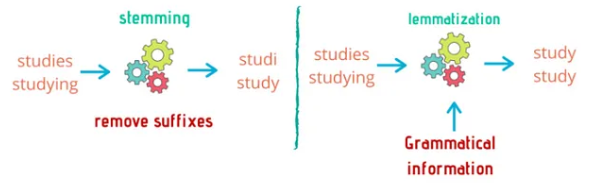

In [17]:
# Stemming

# Porter stemming algorithm is one of the most common stem algorithms which is 
# basically designed to remove and replace well-known suffixes of English words.
# Although the Porter Stemming Algorithm was developed for English texts, 
# it can be adapted to different languages. However, it is more effective 
# to use natural language processing tools and algorithms specifically designed for different languages

from nltk.stem.porter import PorterStemmer

stemmer= PorterStemmer()

def stem_words(text):
    word_list= text.split()
    stems= [stemmer.stem(word) for word in word_list]
    return stems

text= "running playing crying trying tries runs funs tricky slippery trippy sips"
text=text.lower()
print(stem_words(text))

['run', 'play', 'cri', 'tri', 'tri', 'run', 'fun', 'tricki', 'slipperi', 'trippi', 'sip']


In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Lemmatization

# we use a popular lemmatizer called WordNet lemmatizer. 
# WordNet is a word association database for English and a useful resource for English lemmatization.

from nltk.stem import WordNetLemmatizer

lemmatizer= WordNetLemmatizer()

def lemmatize_word(text):
    word_list= text.split()
    lemmas= [lemmatizer.lemmatize(word, pos='v') for word in word_list]
    return lemmas

text= "running playing crying trying tries runs funs trickery slippery trippy sips"
print(lemmatize_word(text))

['run', 'play', 'cry', 'try', 'try', 'run', 'funs', 'trickery', 'slippery', 'trippy', 'sip']


In [14]:
!python --version

Python 3.10.18


**Tokenization and Sequencing**
-

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer


**Tokenization**

The tokenizer doesnt is not case sensitive and it also ignores any punctuations

In [5]:
f=open("book.txt","r")
d=f.read()
sentences=d.split("\n")

tokenizer= Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)      # This tokenizer instance, is fit onto the given sentences.

word_dict= tokenizer.word_index
print(f"number of distinct tokens: {list(word_dict.values())[-1]}\n")
print(word_dict,"\n")

sequences= tokenizer.texts_to_sequences(sentences)
print(sequences)

number of distinct tokens: 98

{'the': 1, 'and': 2, 'of': 3, 'a': 4, 'harry': 5, 'potter': 6, 'series': 7, 'wizard': 8, 'in': 9, 'fantasy': 10, 'novels': 11, 'by': 12, 'british': 13, 'all': 14, 'school': 15, 'story': 16, 'united': 17, 'many': 18, 'includes': 19, 'is': 20, 'seven': 21, 'written': 22, 'author': 23, 'j': 24, 'k': 25, 'rowling': 26, 'chronicle': 27, 'lives': 28, 'young': 29, 'his': 30, 'friends': 31, 'ron': 32, 'weasley': 33, 'hermione': 34, 'granger': 35, 'whom': 36, 'are': 37, 'students': 38, 'at': 39, 'hogwarts': 40, 'witchcraft': 41, 'wizardry': 42, 'main': 43, 'arc': 44, 'concerns': 45, "harry's": 46, 'conflict': 47, 'with': 48, 'lord': 49, 'voldemort': 50, 'dark': 51, 'who': 52, 'intends': 53, 'to': 54, 'become': 55, 'immortal': 56, 'overthrow': 57, 'governing': 58, 'body': 59, 'known': 60, 'as': 61, 'ministry': 62, 'magic': 63, 'subjugate': 64, 'wizards': 65, 'muggles': 66, 'non': 67, 'magical': 68, 'people': 69, 'was': 70, 'originally': 71, 'published': 72, 'englis

**Sequencing**

In [ ]:
sentences= ["I LOVE my dog",
            "i love my dog",
            "I love my cat",
            "I love my dog!!"]

tokenizer= Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)      # This tokenizer instance, is fit onto the given sentences.

print(f"number of distinct tokens: {list(word_dict.values())[-1]}")

word_dict= tokenizer.word_index  # Extract tokens
print(word_dict)

sequences= tokenizer.texts_to_sequences(sentences)   # Convert to sequences
print(sequences)

number of distinct tokens: 98
{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}
[[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 5], [1, 2, 3, 4]]


In [ ]:
test_data= ['I realy love my dog', 'my dog loves eating']

# I am using the above generated tokenizer to extract sequences from test_data
test_sqn= tokenizer.texts_to_sequences(test_data)

# Observe how a 5 word sentences turn into 4 word sentences, so some data is lost
print(word_dict)
print(test_sqn)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}
[[1, 2, 3, 4], [3, 4]]


In [ ]:
sentences= ["I LOVE my dog",
            "i love my dog",
            "I love my cat",
            "I love my dog!!"]

# OOV stands for "Out-Of-Volcablury", this property will generate token for unseen token and hences preserve the sentence.
tokenizer= Tokenizer(num_words=100, oov_token="<OOV>")  
tokenizer.fit_on_texts(sentences)    


# Here, we can see that the very first token is <OOV> and this will be used for all the instances of unseen tokens in test_data.
word_dict= tokenizer.word_index  
sequences= tokenizer.texts_to_sequences(sentences)   
print(word_dict)

test_data= ['I realy love my dog', 'my dog loves eating']
test_sqn= tokenizer.texts_to_sequences(test_data)
print(test_sqn)

number of distinct tokens: 6
{'<OOV>': 1, 'i': 2, 'love': 3, 'my': 4, 'dog': 5, 'cat': 6}
[[2, 1, 3, 4, 5], [4, 5, 1, 1]]


In order to feed this Data into a NN, the size of the sentences should be the same we will pad the sentences, so we pad them with zero, similar to how we used to do with Images.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences= ["I LOVE my dog",
            "i love my dog!!",
            "I love my cat",
            "I love my dog and he loves me too"]

tokenizer= Tokenizer(num_words=100, oov_token="<OOV>")  
tokenizer.fit_on_texts(sentences)    

word_dict= tokenizer.word_index  
sequences= tokenizer.texts_to_sequences(sentences)  
print(word_dict,"\n") 
print(sequences, "\n")

# pad_sequences(< sequences >, < padding=(pre/post) >, < truncating=(pre/post), < maxlen=(number) >)
# truncating parameter is used if we use maxlen, where to truncate the sentences it len(sentence)>maxlen.
padded_sqn= pad_sequences(sequences, padding='pre')
print(padded_sqn)

{'<OOV>': 1, 'i': 2, 'love': 3, 'my': 4, 'dog': 5, 'cat': 6, 'and': 7, 'he': 8, 'loves': 9, 'me': 10, 'too': 11} 

[[2, 3, 4, 5], [2, 3, 4, 5], [2, 3, 4, 6], [2, 3, 4, 5, 7, 8, 9, 10, 11]] 

[[ 0  0  0  0  0  2  3  4  5]
 [ 0  0  0  0  0  2  3  4  5]
 [ 0  0  0  0  0  2  3  4  6]
 [ 2  3  4  5  7  8  9 10 11]]


# Text Vectorization

Text vectorization is the process of converting text data—such as words, sentences, or documents—into numerical vectors that machine learning algorithms can process and analyze.

eg: BoW, TF-IDF, Word2Vec, GloVe etc (Each have a different application)

**BoW (Bag of Words)**
-
This method involves converting text into a vector based on the frequency of words in the text, without considering the order or context of the words.

Generate unique words after steps of pre-processing, these essentailly create the BoW and they we use these as One-hot encoders for each sentence in the corpus, but you wont get any context of the order.

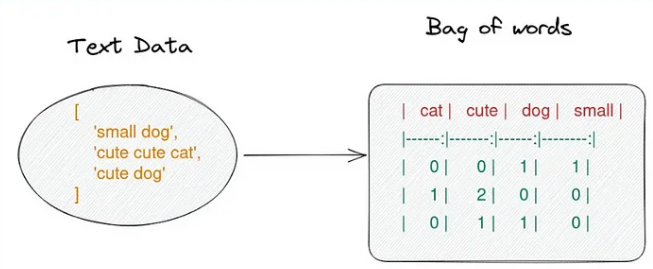

In [39]:
import nltk
import re
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import pandas as pd

# nltk.download('stopwords')

In [8]:
# Coustimer review analysis

lemmatizer= WordNetLemmatizer()
def text_preprocessing(text):
    text=text.lower()
    word_list= text.split()
    stop_words_set= set(stopwords.words('english'))

    # reduce words to baseform and remove stop-words
    text= [lemmatizer.lemmatize(word) for word in word_list if not word in stop_words_set] 
    
    text=' '.join(text)                  # ' ' <-- an empty string
    # remove punctuations
    # print(text)
    text= re.sub(r'[^\w\s]', '', text)   

    #remove emoji
    emoji_pattern = r'^(?:[\u2700-\u27bf]|(?:\ud83c[\udde6-\uddff]){1,2}|(?:\ud83d[\udc00-\ude4f]){1,2}|[\ud800-\udbff][\udc00-\udfff]|[\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e]|\u3299|\u3297|\u303d|\u3030|\u24c2|\ud83c[\udd70-\udd71]|\ud83c[\udd7e-\udd7f]|\ud83c\udd8e|\ud83c[\udd91-\udd9a]|\ud83c[\udde6-\uddff]|\ud83c[\ude01-\ude02]|\ud83c\ude1a|\ud83c\ude2f|\ud83c[\ude32-\ude3a]|\ud83c[\ude50-\ude51]|\u203c|\u2049|\u25aa|\u25ab|\u25b6|\u25c0|\u25fb|\u25fc|\u25fd|\u25fe|\u2600|\u2601|\u260e|\u2611|[^\u0000-\u007F])+$'
    text= re.sub(emoji_pattern,'',text)

    text=text.strip()
    
    return text

text="""The product was really really bad, totally dissapointing and waste of money.I wouldn't even like to give it one star review.It only looked good in the pictures in real life it is dissapointing"""

sentence_list= text.split('.')

corpus= [text_preprocessing(sentence) for sentence in sentence_list]
print(corpus)


['product really really bad totally dissapointing waste money', 'even like give one star review', 'looked good picture real life dissapointing']


In [82]:
# creating BoW model

from sklearn.feature_extraction.text import CountVectorizer

vectorizer= CountVectorizer()

d=vectorizer.fit_transform(corpus)
feature_names= vectorizer.get_feature_names_out()
d_array= d.toarray()

print(f'Unique words :\n {feature_names}\n')
print(f'BoW:\n {d_array}')

Unique words :
 ['bad' 'dissapointing' 'even' 'give' 'good' 'ictures' 'life' 'like'
 'looked' 'money' 'one' 'product' 'real' 'really' 'review' 'star'
 'totally' 'waste']

BoW:
 [[1 1 0 0 0 0 0 0 0 1 0 1 0 2 0 0 1 1]
 [0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0]
 [0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0]]


In [83]:
df= pd.DataFrame(data= d_array, columns= feature_names, index= corpus)
print(df)

                                                    bad  dissapointing  even  \
product really really bad totally dissapointing...    1              1     0   
even like give one star review                        0              0     1   
looked good ictures real life dissapointing           0              1     0   

                                                    give  good  ictures  life  \
product really really bad totally dissapointing...     0     0        0     0   
even like give one star review                         1     0        0     0   
looked good ictures real life dissapointing            0     1        1     1   

                                                    like  looked  money  one  \
product really really bad totally dissapointing...     0       0      1    0   
even like give one star review                         1       0      0    1   
looked good ictures real life dissapointing            0       1      0    0   

                                 

**TF-IDF**
-
Term Frequency - Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. It measures how important a term is within a document relative to a collection of documents.

Importance of a term is high when it occurs a lot in a given document and rarely in others. In short, commonality within a document measured by TF is balanced by rarity between documents measured by IDF.

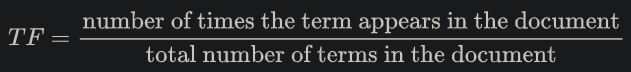

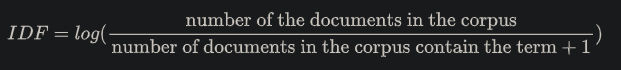

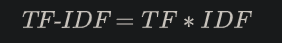

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tr_idf_model= TfidfVectorizer()

corpus= ["The product was really really bad, totally dissapointing and waste of money.","I wouldn't even like to give it one star review.It only looked good in the ictures in real life it is dissapointing"]
tf_idf_vector = tr_idf_model.fit_transform(corpus)

print(type(tf_idf_vector), tf_idf_vector.shape)

tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array)

<class 'scipy.sparse._csr.csr_matrix'> (2, 28)
[[0.27721698 0.27721698 0.19724217 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.27721698 0.27721698 0.         0.         0.27721698
  0.         0.55443396 0.         0.         0.19724217 0.
  0.27721698 0.27721698 0.27721698 0.        ]
 [0.         0.         0.13209532 0.18565537 0.18565537 0.18565537
  0.18565537 0.37131074 0.18565537 0.55696611 0.18565537 0.18565537
  0.18565537 0.         0.         0.18565537 0.18565537 0.
  0.18565537 0.         0.18565537 0.18565537 0.13209532 0.18565537
  0.         0.         0.         0.18565537]]


In [9]:
import pandas as pd

words_set = tr_idf_model.get_feature_names_out()

df= pd.DataFrame(tf_idf_array, columns = words_set)
print(df)

        and       bad  dissapointing      even      give      good   ictures  \
0  0.277217  0.277217       0.197242  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000       0.132095  0.185655  0.185655  0.185655  0.185655   

         in        is        it  ...      real    really    review      star  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.554434  0.000000  0.000000   
1  0.371311  0.185655  0.556966  ...  0.185655  0.000000  0.185655  0.185655   

        the        to   totally       was     waste    wouldn  
0  0.197242  0.000000  0.277217  0.277217  0.277217  0.000000  
1  0.132095  0.185655  0.000000  0.000000  0.000000  0.185655  

[2 rows x 28 columns]


**Word2Vec**
-
Text Vectorization techiniques,includes two architectures: CBoW and Skip-grams.

1. CBoW take context and predict target.
2. Skip-grams take target and predict context

**Continous BoW**
-
The BoW model represents text as a collection of words and their frequency in a given document or corpus. The BoW model is simple and easy to implement, but it has limitations in capturing the meaning of language.

In contrast, the CBOW model is a neural network-based approach that captures the context of words. It learns to predict the target word based on the words that appear before and after it in a given context window.

eg: "I love playing Football", the CBOW models convert this into context words and target pairs, like ([I, playing], love), ([love, football], playing) , for this example the window_size is=1(per side).

The window corresponts to context.

![WhatsApp Image 2025-06-11 at 16.59.31_4836521d.jpg](<attachment:WhatsApp Image 2025-06-11 at 16.59.31_4836521d.jpg>)

![WhatsApp Image 2025-06-11 at 16.59.32_283ae63c.jpg](<attachment:WhatsApp Image 2025-06-11 at 16.59.32_283ae63c.jpg>)
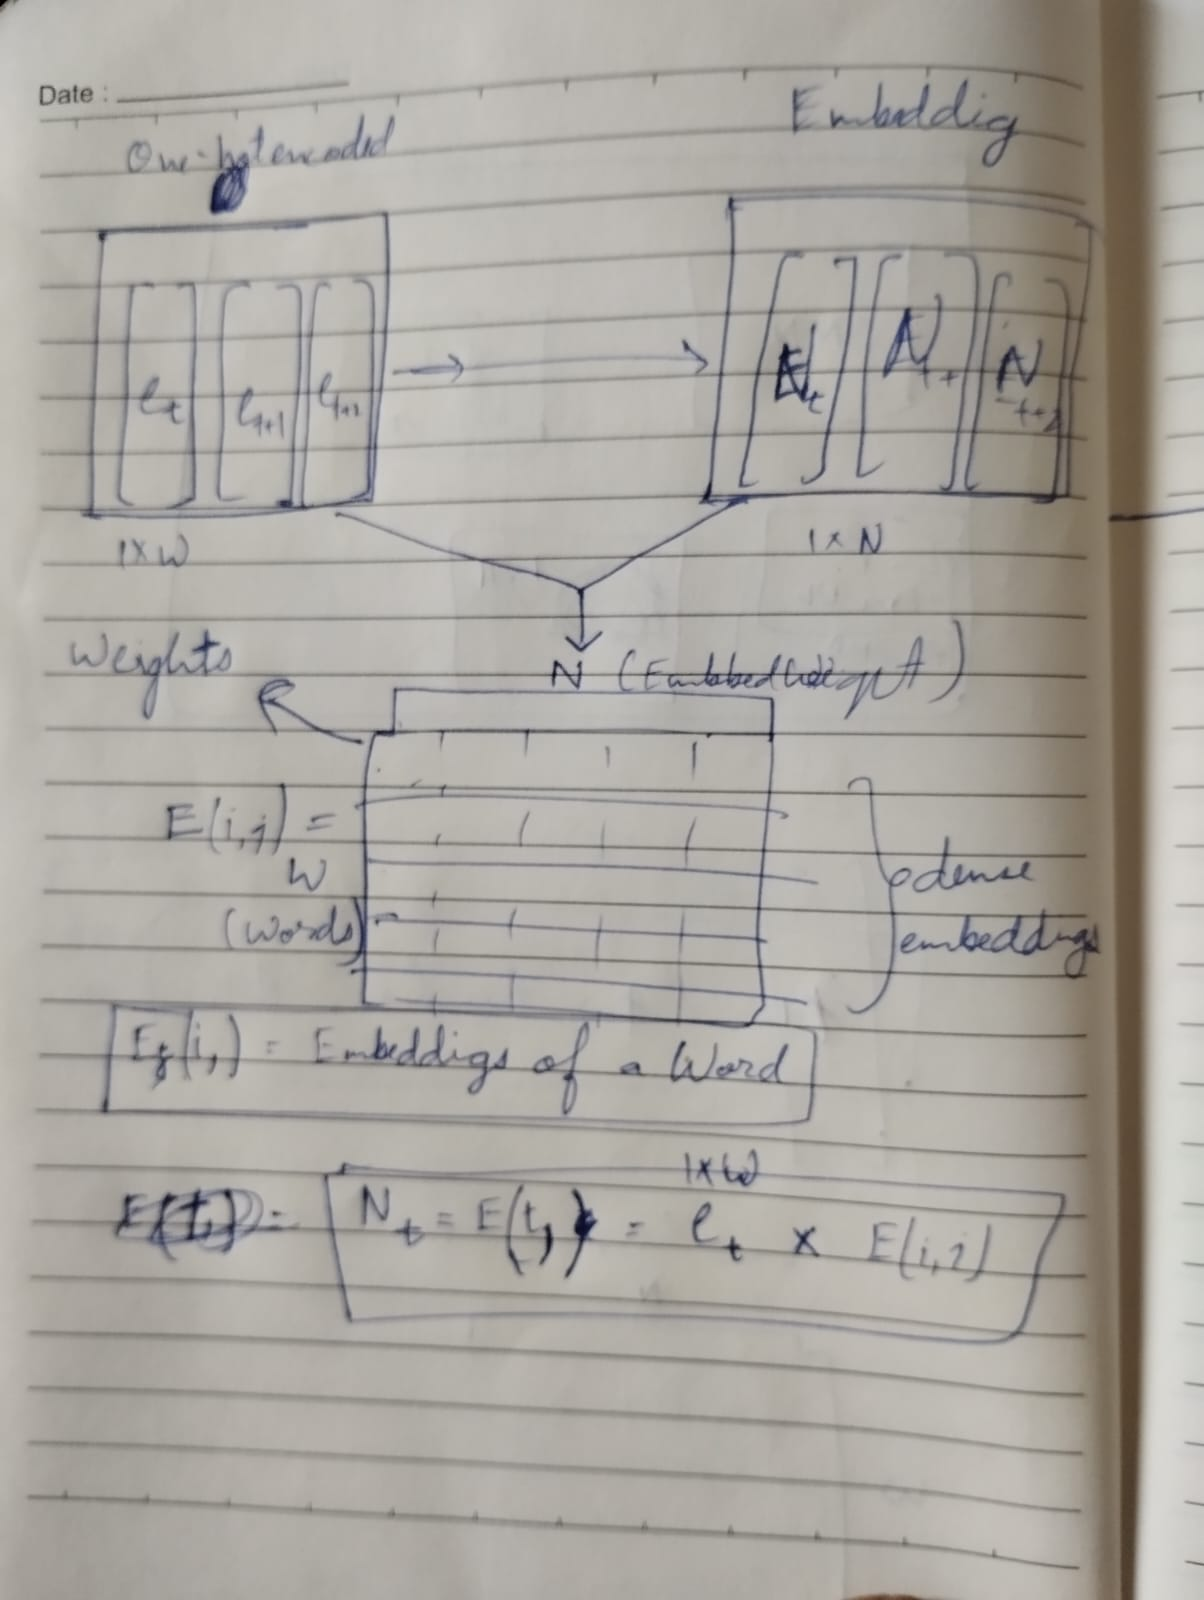
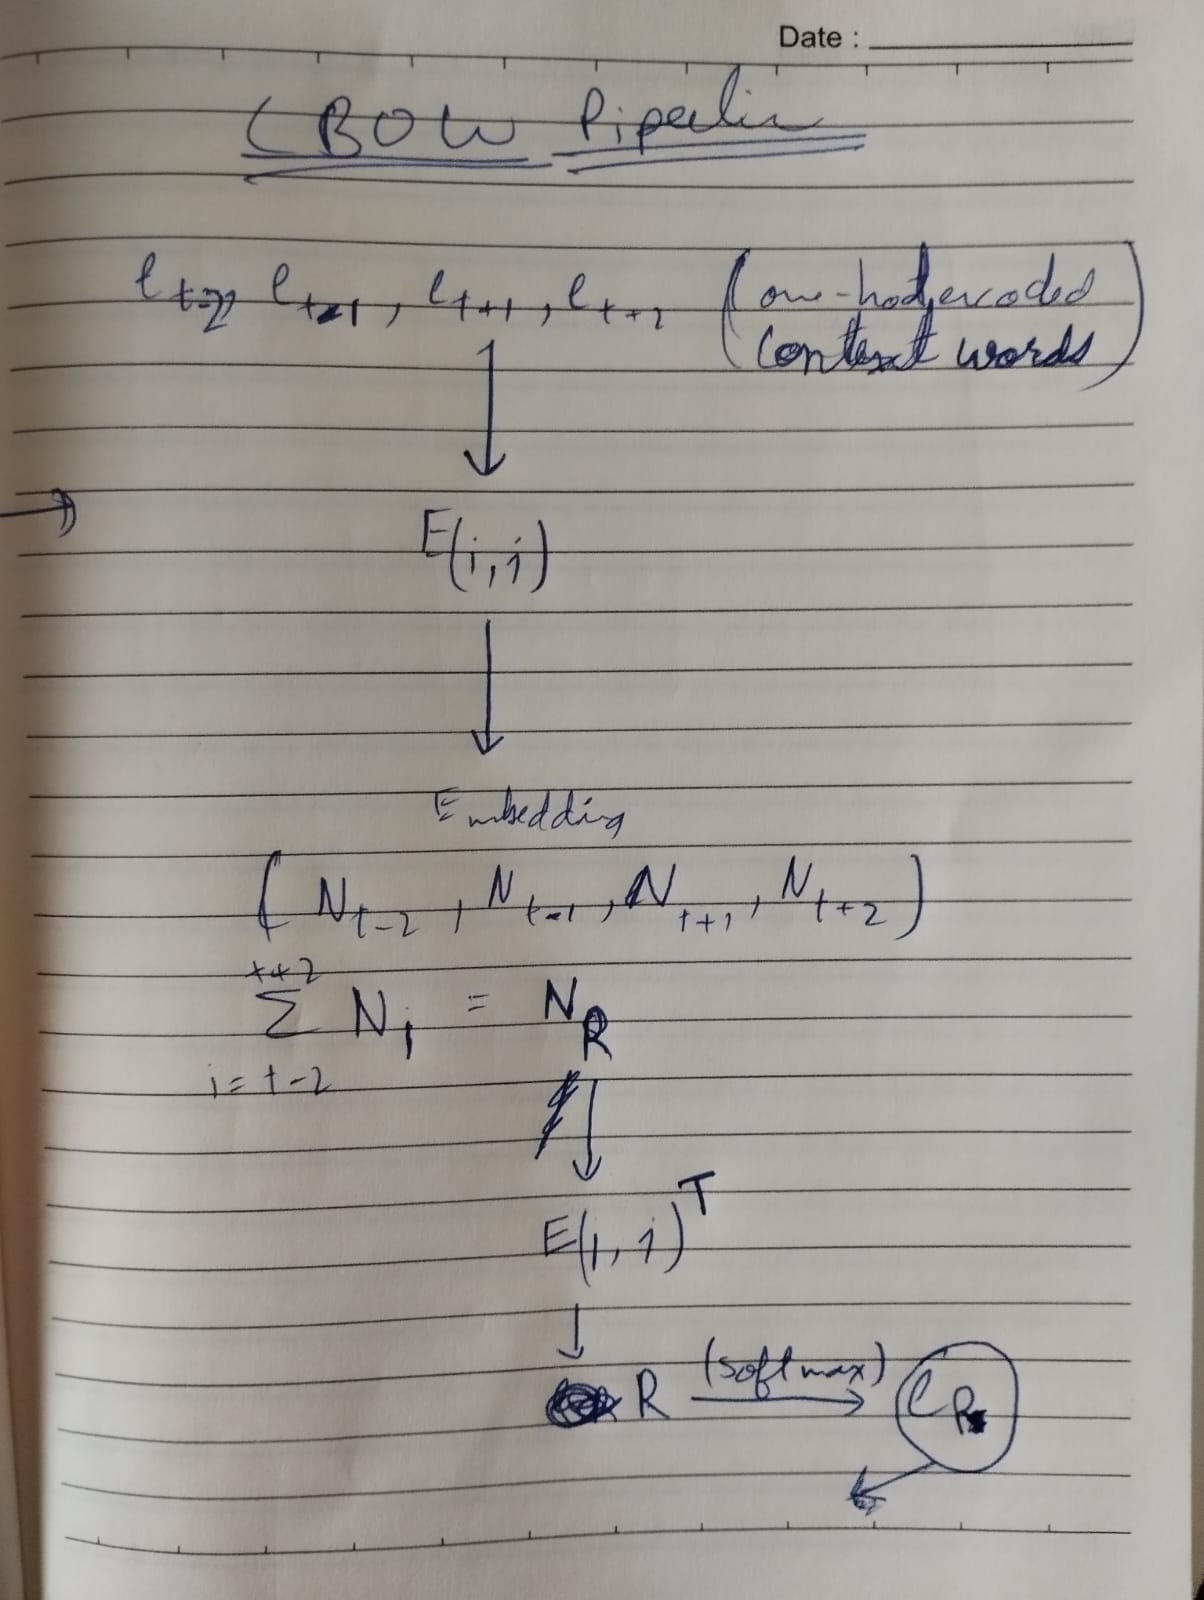

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

corpus= ['The cat sat on the mat',
         'The dog ran in the park',
         'The bird sang in the tree']

tokenizer= Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences= tokenizer.texts_to_sequences(corpus)
print(sequences)

[[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]]


In [ ]:
vocab_size= len(tokenizer.word_index)+1
embedding_size= 10
window_size= 2

# Generate Context-target pairs
contexts= []
targets= []

for sequence in sequences:
    for i in range(window_size, len(sequence)-window_size):
        context= sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
        target= sequence[i]
        contexts.append(context)
        targets.append(target)

# Convert the contexts and targets to numpy arrays
x= np.array(contexts)
y= to_categorical(targets, num_classes= vocab_size)

model= Sequential()

# The hidden layer (Takes input of 1XW and give output as 1XN One-hot encoding to )
model.add(Embedding(input_dim= vocab_size, output_dim= embedding_size, input_length= 2*window_size))

model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x, y, epochs=100, verbose=1)


Epoch 1/100


C:\Users\AYUSH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step - accuracy: 0.0000e+00 - loss: 2.5726
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.0000e+00 - loss: 2.5696
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0000e+00 - loss: 2.5665
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0000e+00 - loss: 2.5635
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0000e+00 - loss: 2.5605
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0000e+00 - loss: 2.5575
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0000e+00 - loss: 2.5545
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1667 - loss: 2.5515
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.1667 - loss: 2.5485
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1667 - loss: 2.5455
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3333 - loss: 2.5425
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accu

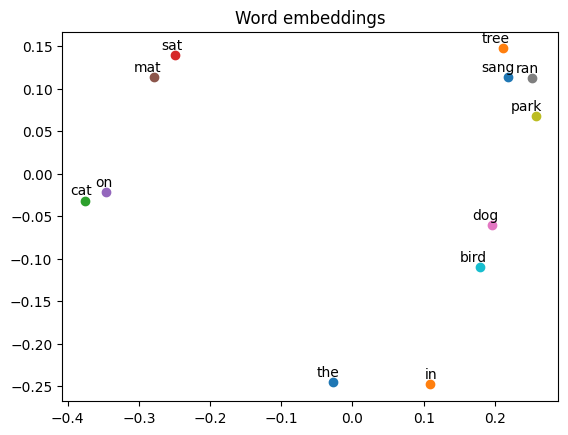

In [ ]:
# Extract the embeddings
embedding_layer= model.layers[0]
embeddings= embedding_layer.get_weights()[0]

# Perfrom PCA to reduce the dimensionality of embeddings
pca= PCA(n_components=2)
reduced_embeddings= pca.fit_transform(embeddings)

# Visualize the embeddings
for words, idx in tokenizer.word_index.items():
    x, y= reduced_embeddings[idx]
    plt.scatter(x, y)
    plt.annotate(words, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.title("Word embeddings")
plt.show()

**Skip-grams**
-
Its architecture is kinda reverse to the Architecture of CBoW.


**Word2Vec**
-
Herewe will see CBoW in action using Word2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec
import numpy as np

# Sample corpus 
corpus = [
    "the cat sat on the mat".split(),
    "the dog chased the cat".split(),
    "the dog barked loudly".split(),
    "cats and dogs are animals".split(),
    "the mat was sat on by the cat".split(),
    "dogs love to chase cats".split(),
    "cats love to sleep on mats".split()
]

In [54]:
model_1 = Word2Vec(
    sentences=corpus,
    vector_size=50,   # Embedding dimension
    window=2,         # Context window size
    min_count=1,      # Include all words
    sg=0              # CBOW (set sg=1 for skip-gram)
)

In [55]:
print(model_1.wv["cat"])

[-0.01631583  0.0089916  -0.00827415  0.00164907  0.01699724 -0.00892435
  0.009035   -0.01357392 -0.00709698  0.01879702 -0.00315531  0.00064274
 -0.00828126 -0.01536538 -0.00301602  0.00493959 -0.00177605  0.01106732
 -0.00548595  0.00452013  0.01091159  0.01669191 -0.00290748 -0.01841629
  0.0087411   0.00114357  0.01488382 -0.00162657 -0.00527683 -0.01750602
 -0.00171311  0.00565313  0.01080286  0.01410531 -0.01140624  0.00371764
  0.01217773 -0.0095961  -0.00621452  0.01359526  0.00326295  0.00037983
  0.00694727  0.00043555  0.01923765  0.01012121 -0.01783478 -0.01408312
  0.00180291  0.01278507]


In [56]:
def recommend_words(context_words, model_1, topn=5):
    # Check if all context words are in the vocabulary
    valid_words = [w for w in context_words if w in model_1.wv]
    if not valid_words:
        return ["No context words in vocabulary."]
    
    # Get the average embedding of the context words
    mean_vec = np.mean([model_1.wv[w] for w in valid_words], axis=0)

    # Find most similar words to the average vector using cosine distance
    recommendations = model_1.wv.similar_by_vector(mean_vec, topn=topn)
    
    # Exclude the context words themselves
    return [word for word, score in recommendations if word not in context_words]

In [59]:
context = ["the", "cat", "on", "the"]
suggestions = recommend_words(context, model_1)
print(f"Given context words {context}, you might also consider: {suggestions}")

Given context words ['the', 'cat', 'on', 'the'], you might also consider: ['by', 'sleep']


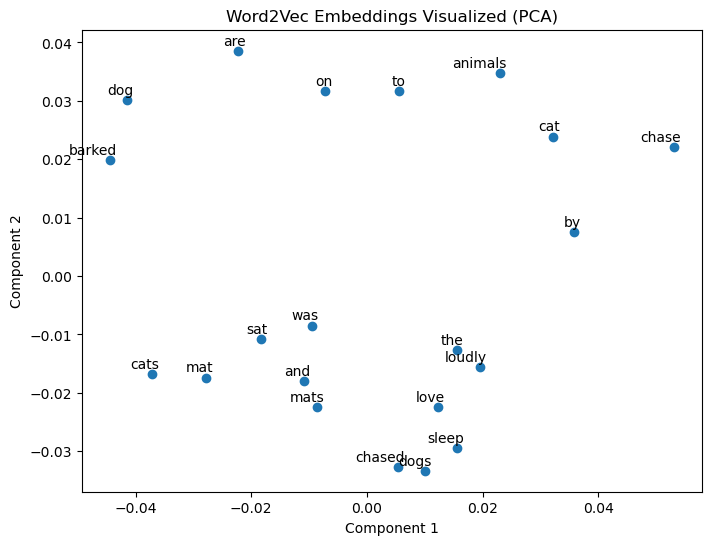

In [58]:
# Visualize the embedding
import matplotlib.pyplot as plt

words= list(model.wv.index_to_key)  # List of vocabulary words
X= np.array([model.wv[word] for word in words])  # Embedding vectors

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title("Word2Vec Embeddings Visualized (PCA)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [50]:
model_2 = Word2Vec(
    sentences=corpus,
    vector_size=50,   # Embedding dimension
    window=2,         # Context window size
    min_count=1,      # Include all words
    sg=1              # Skip-gram 
)

In [60]:
similar = model_2.wv.most_similar("sat")
print(similar)

[('was', 0.20483414828777313), ('love', 0.1833113133907318), ('barked', 0.16942572593688965), ('mat', 0.11253629624843597), ('and', 0.09969373792409897), ('dogs', 0.08992894738912582), ('on', 0.08883244544267654), ('cat', 0.07399574667215347), ('chased', 0.06110017001628876), ('animals', -0.006291494704782963)]


**GloVe**
-
GloVe stands for Global Vectors for Word Representation, it’s an unsupervised learning algorithm for obtaining vector representations for words.

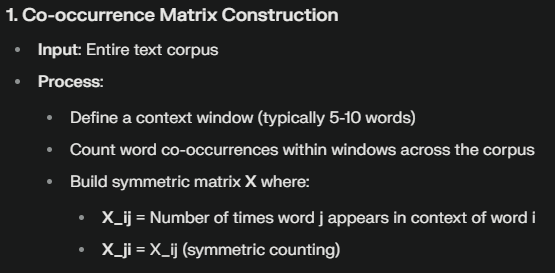

eg: Sentence: "the quick brown fox jumps"
Co-occurrences for "brown":
- the (distance 2), quick (distance 1), fox (distance 1), jumps (distance 2)

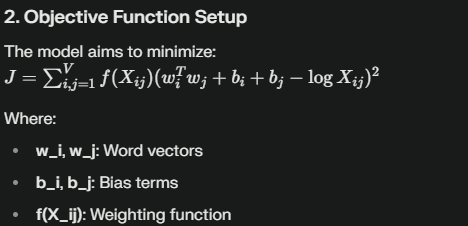

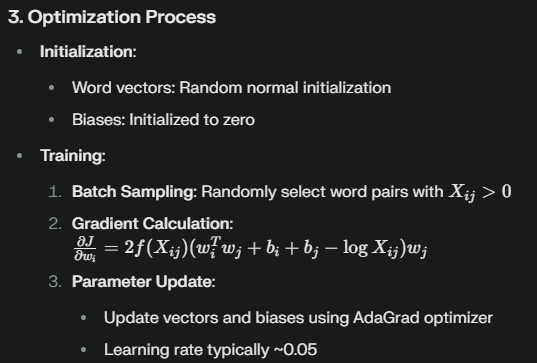

![WhatsApp Image 2025-06-14 at 02.12.17_3def8a06.jpg](<attachment:WhatsApp Image 2025-06-14 at 02.12.17_3def8a06.jpg>)
![WhatsApp Image 2025-06-14 at 02.12.17_01aeaa9d.jpg](<attachment:WhatsApp Image 2025-06-14 at 02.12.17_01aeaa9d.jpg>)
![WhatsApp Image 2025-06-14 at 02.12.18_d6f76106.jpg](<attachment:WhatsApp Image 2025-06-14 at 02.12.18_d6f76106.jpg>)
![WhatsApp Image 2025-06-14 at 02.12.18_1a4a56a1.jpg](<attachment:WhatsApp Image 2025-06-14 at 02.12.18_1a4a56a1.jpg>)
![WhatsApp Image 2025-06-14 at 02.12.18_66c749bf.jpg](<attachment:WhatsApp Image 2025-06-14 at 02.12.18_66c749bf.jpg>)
![WhatsApp Image 2025-06-14 at 02.12.19_eb5c1155.jpg](<attachment:WhatsApp Image 2025-06-14 at 02.12.19_eb5c1155.jpg>)
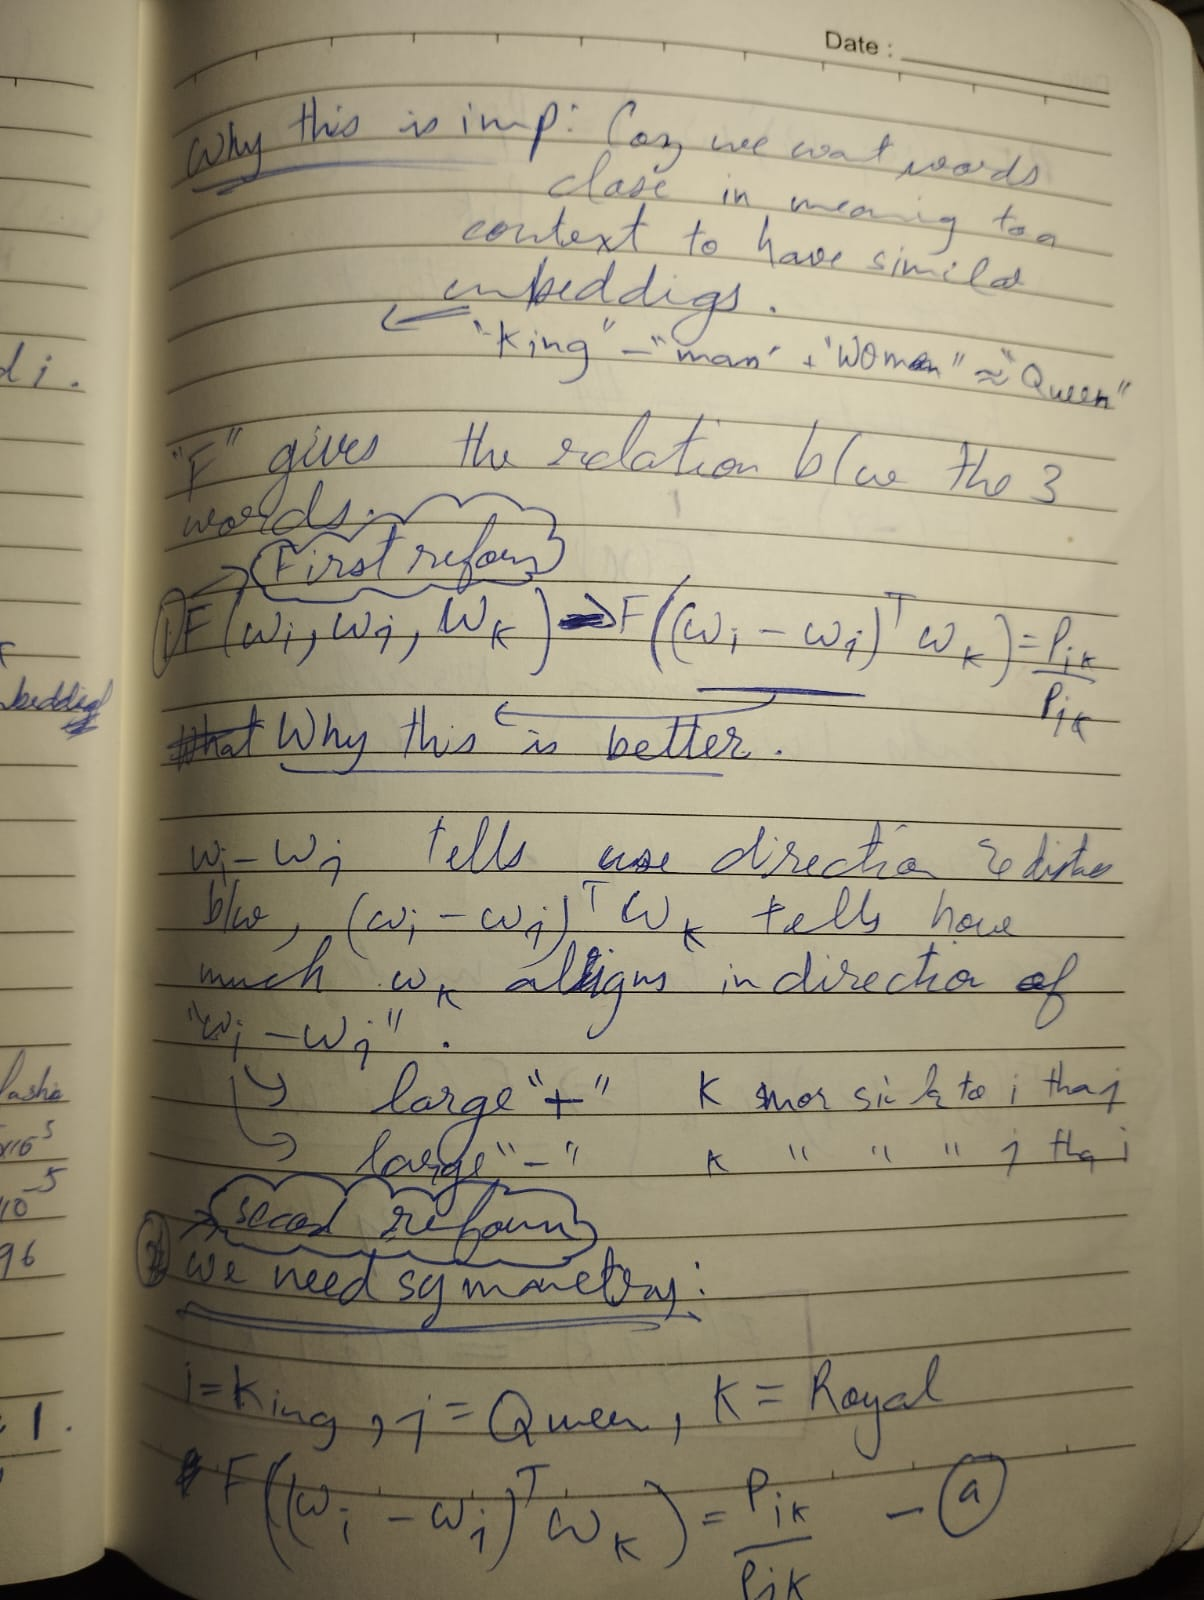
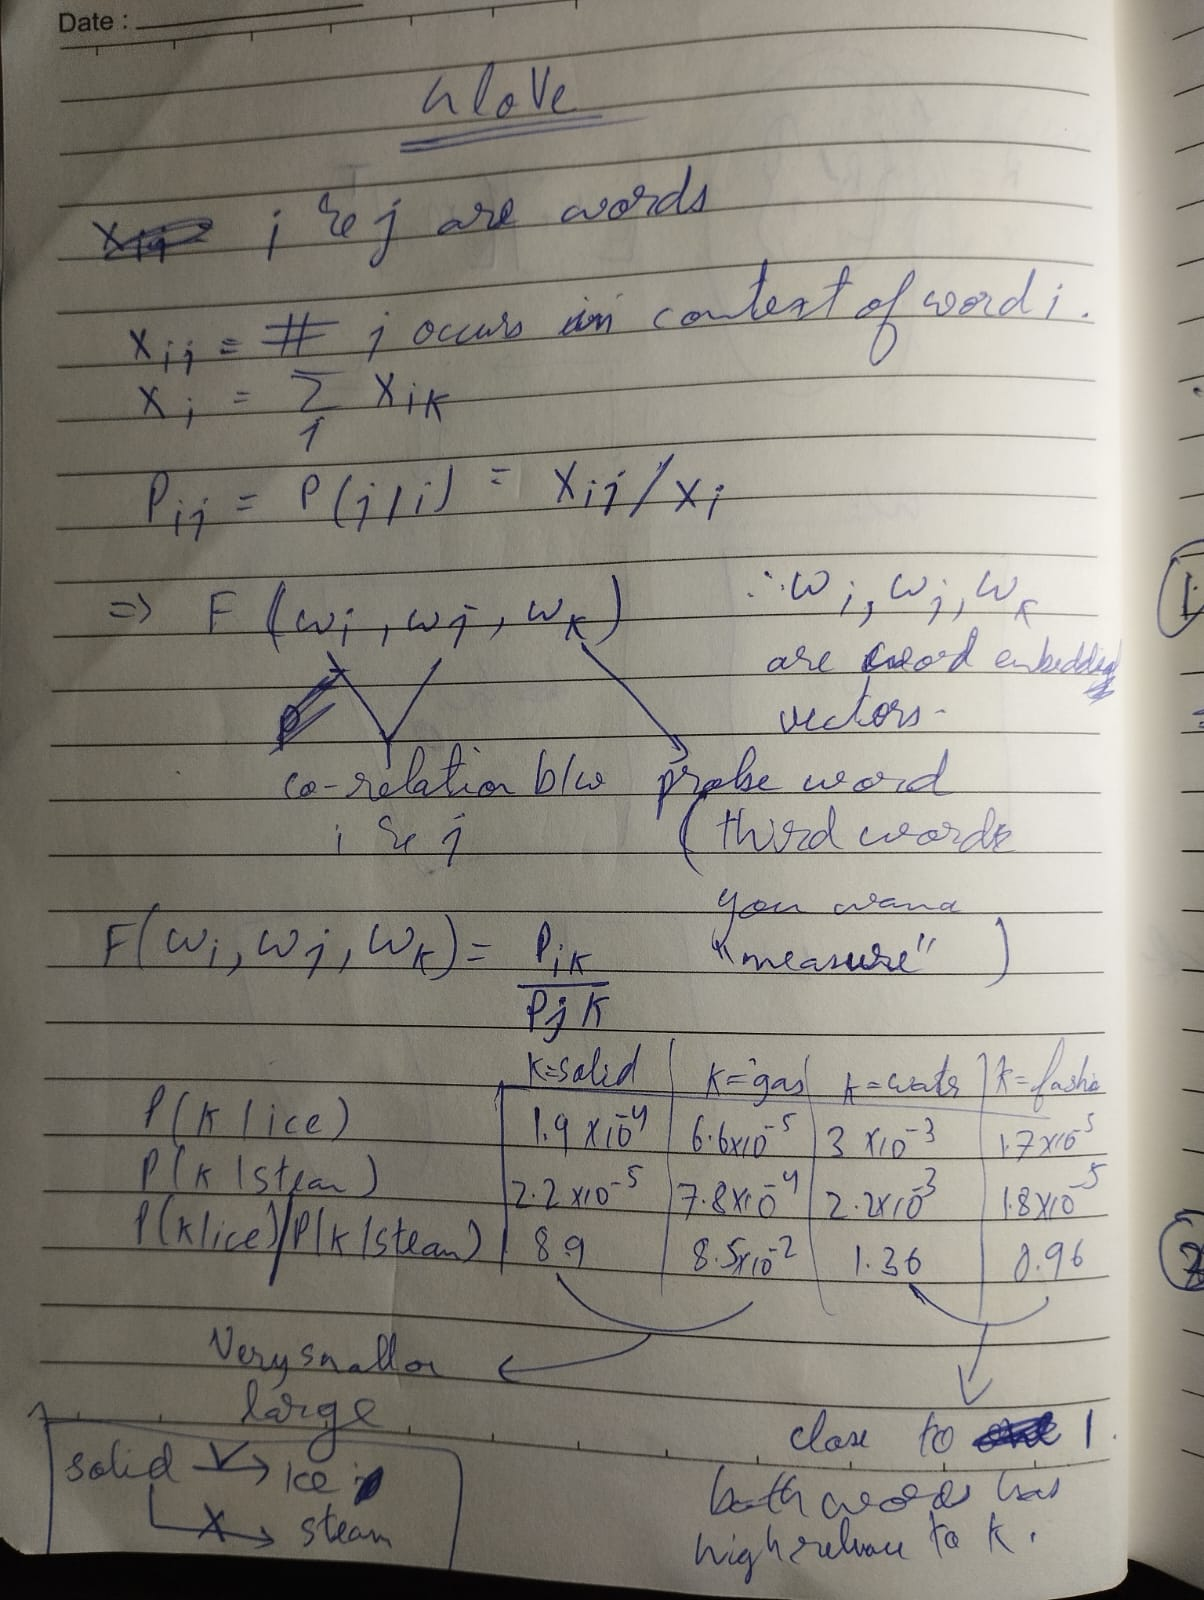
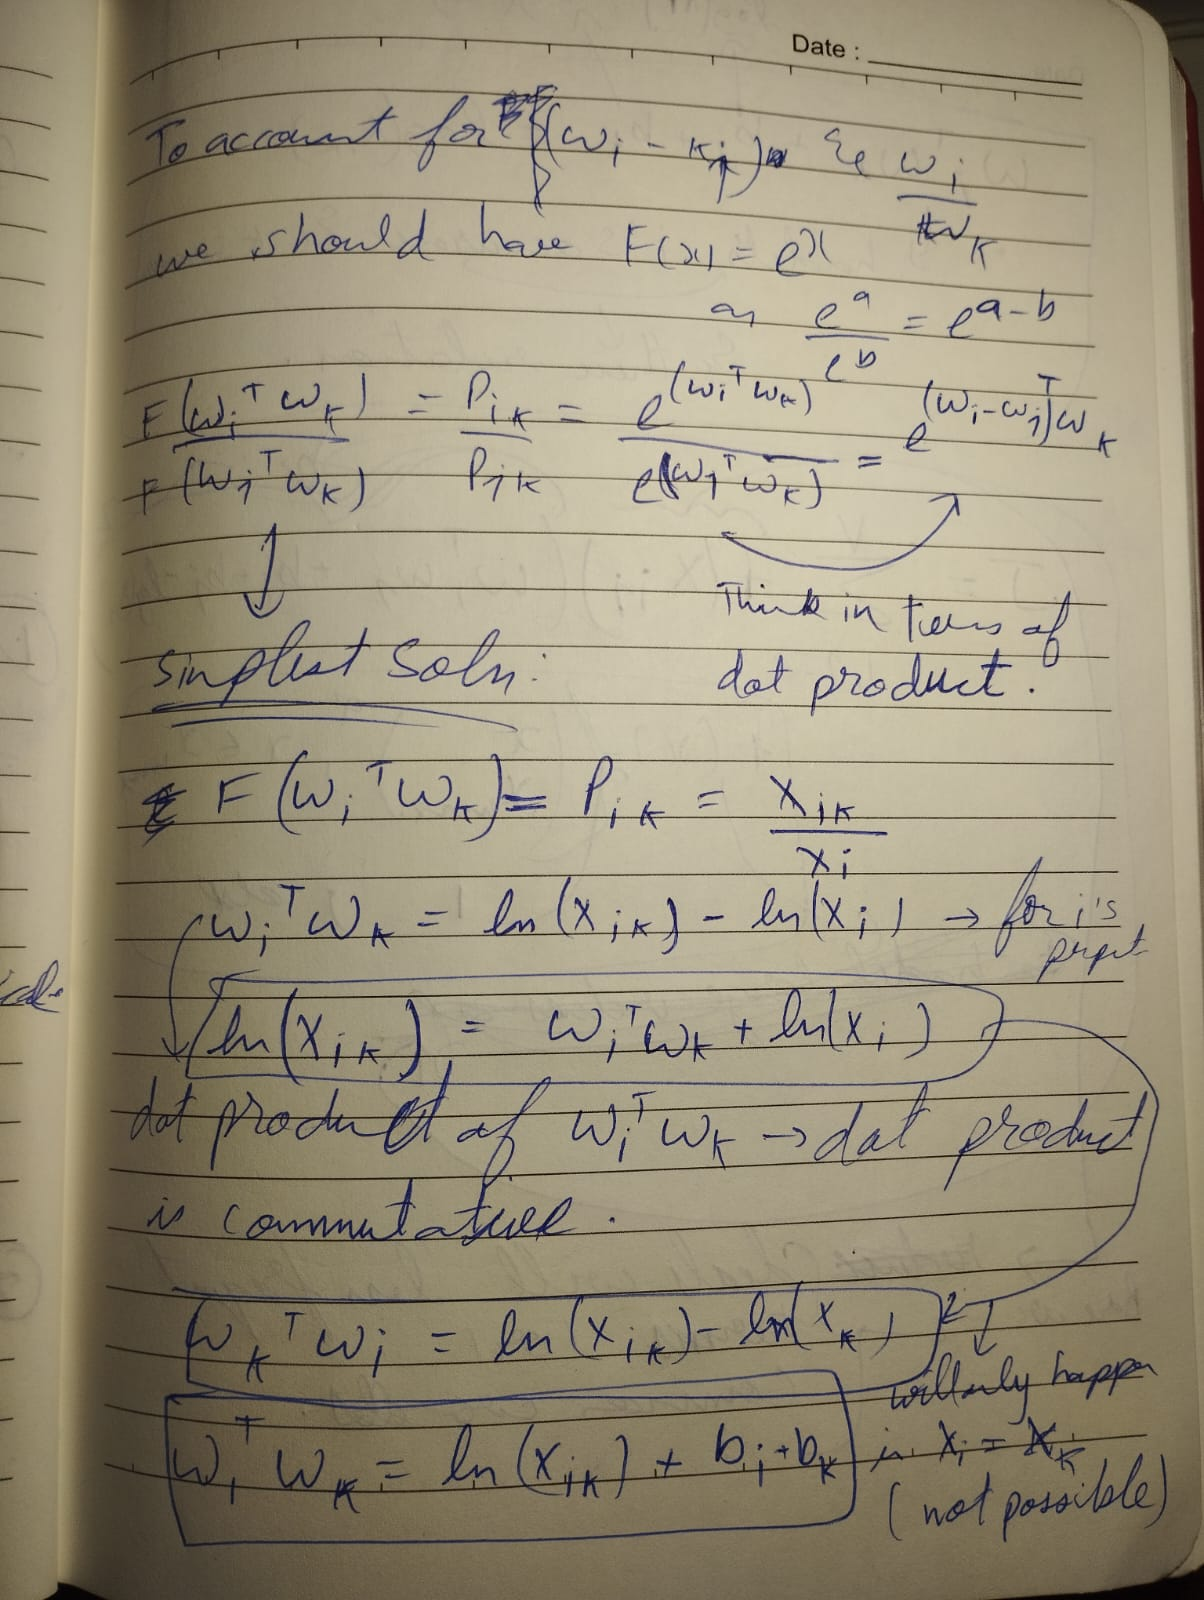
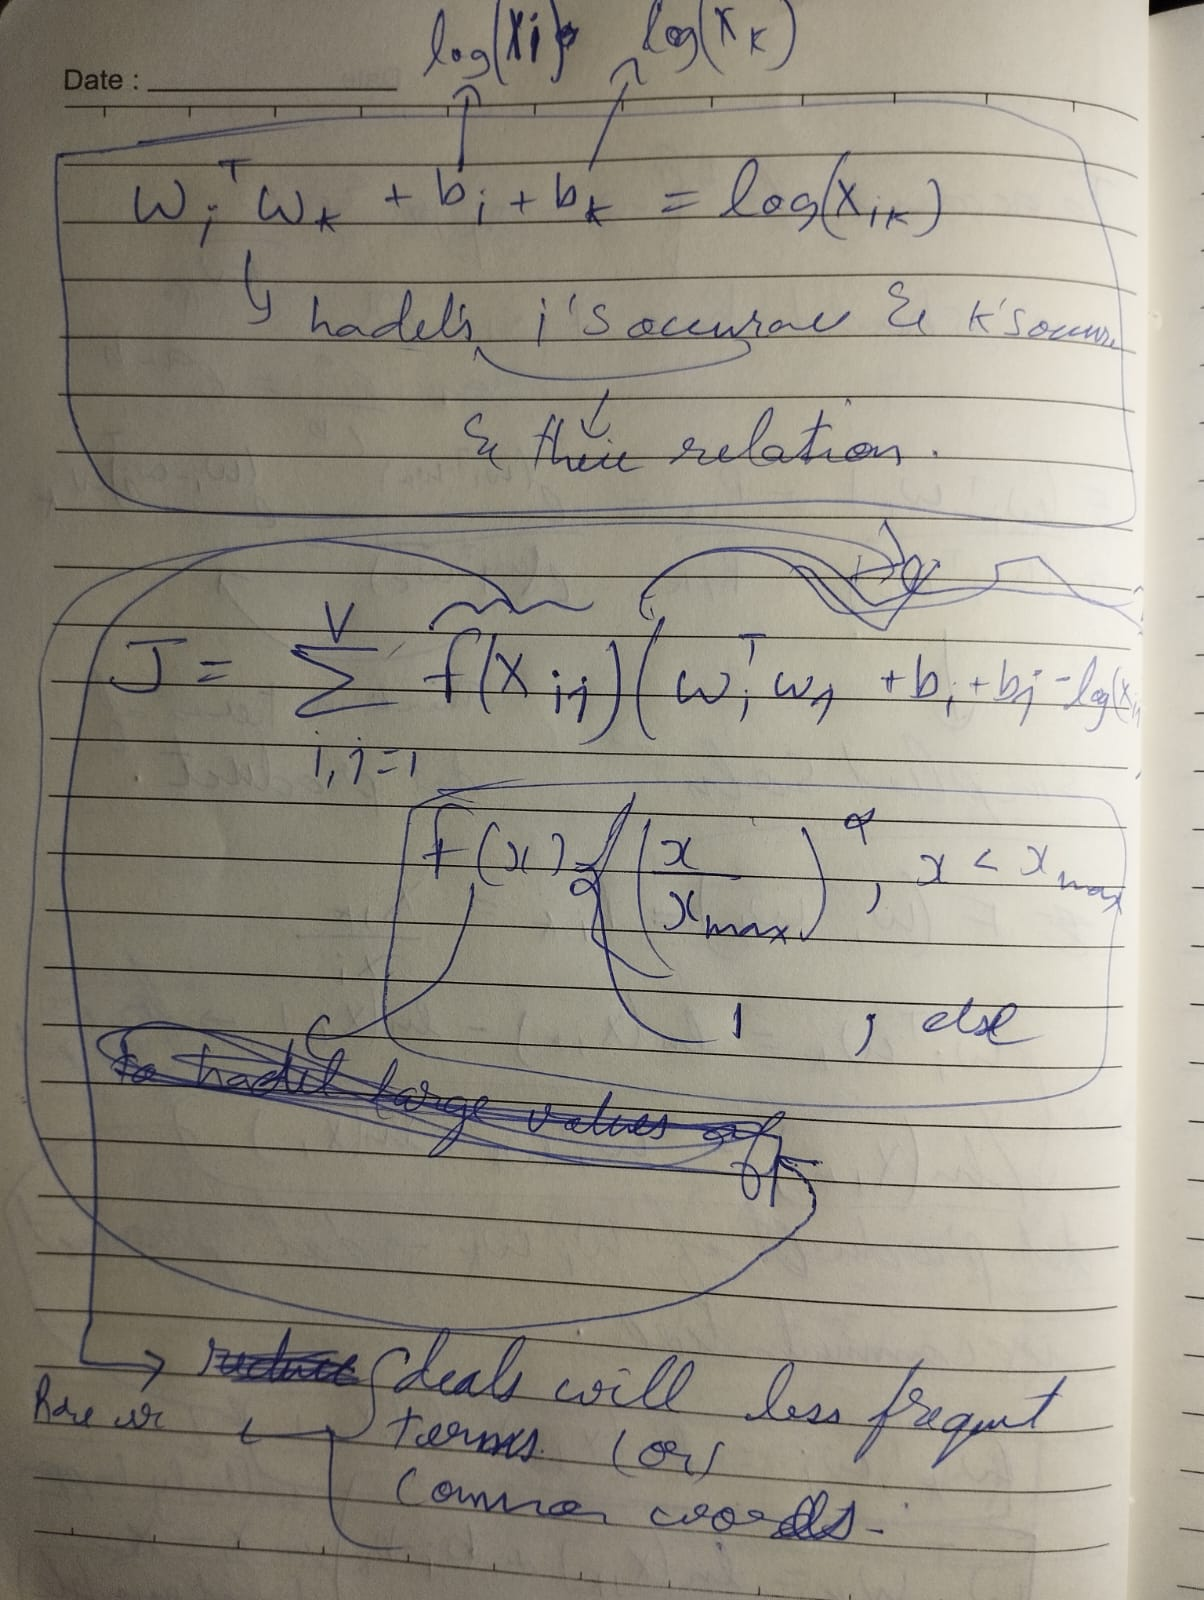
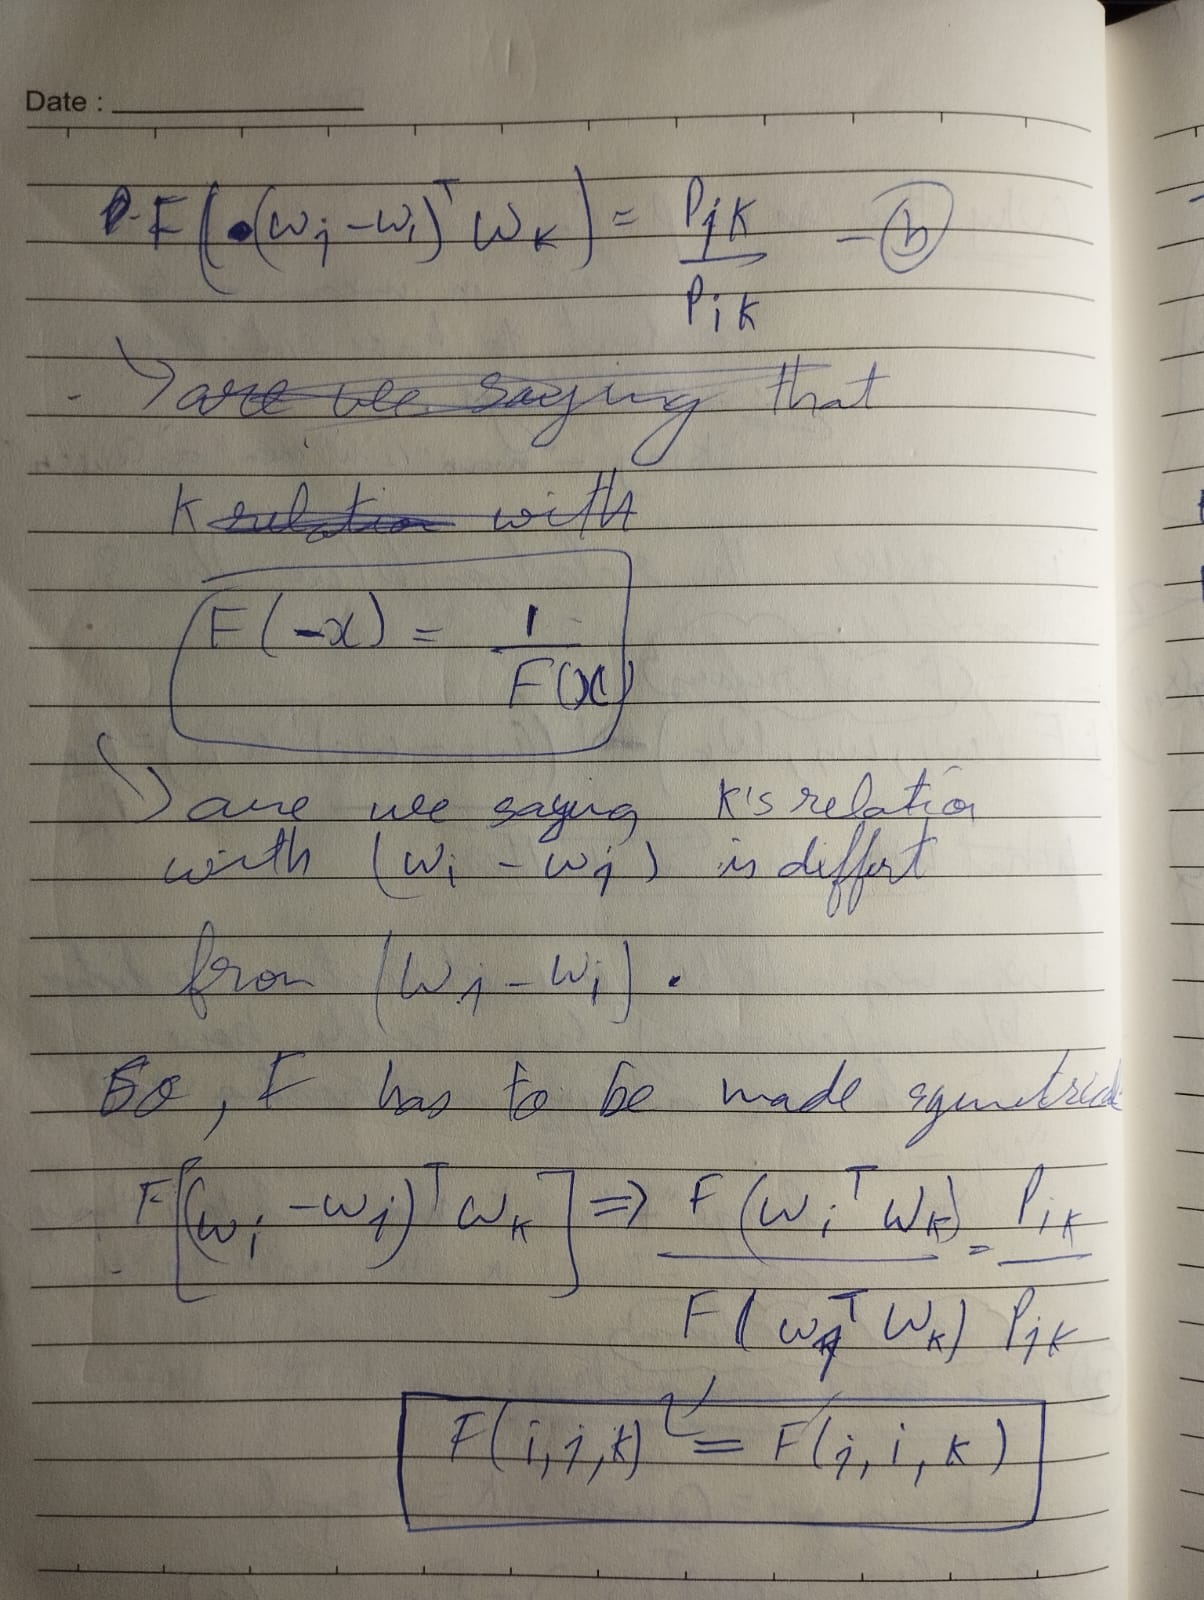
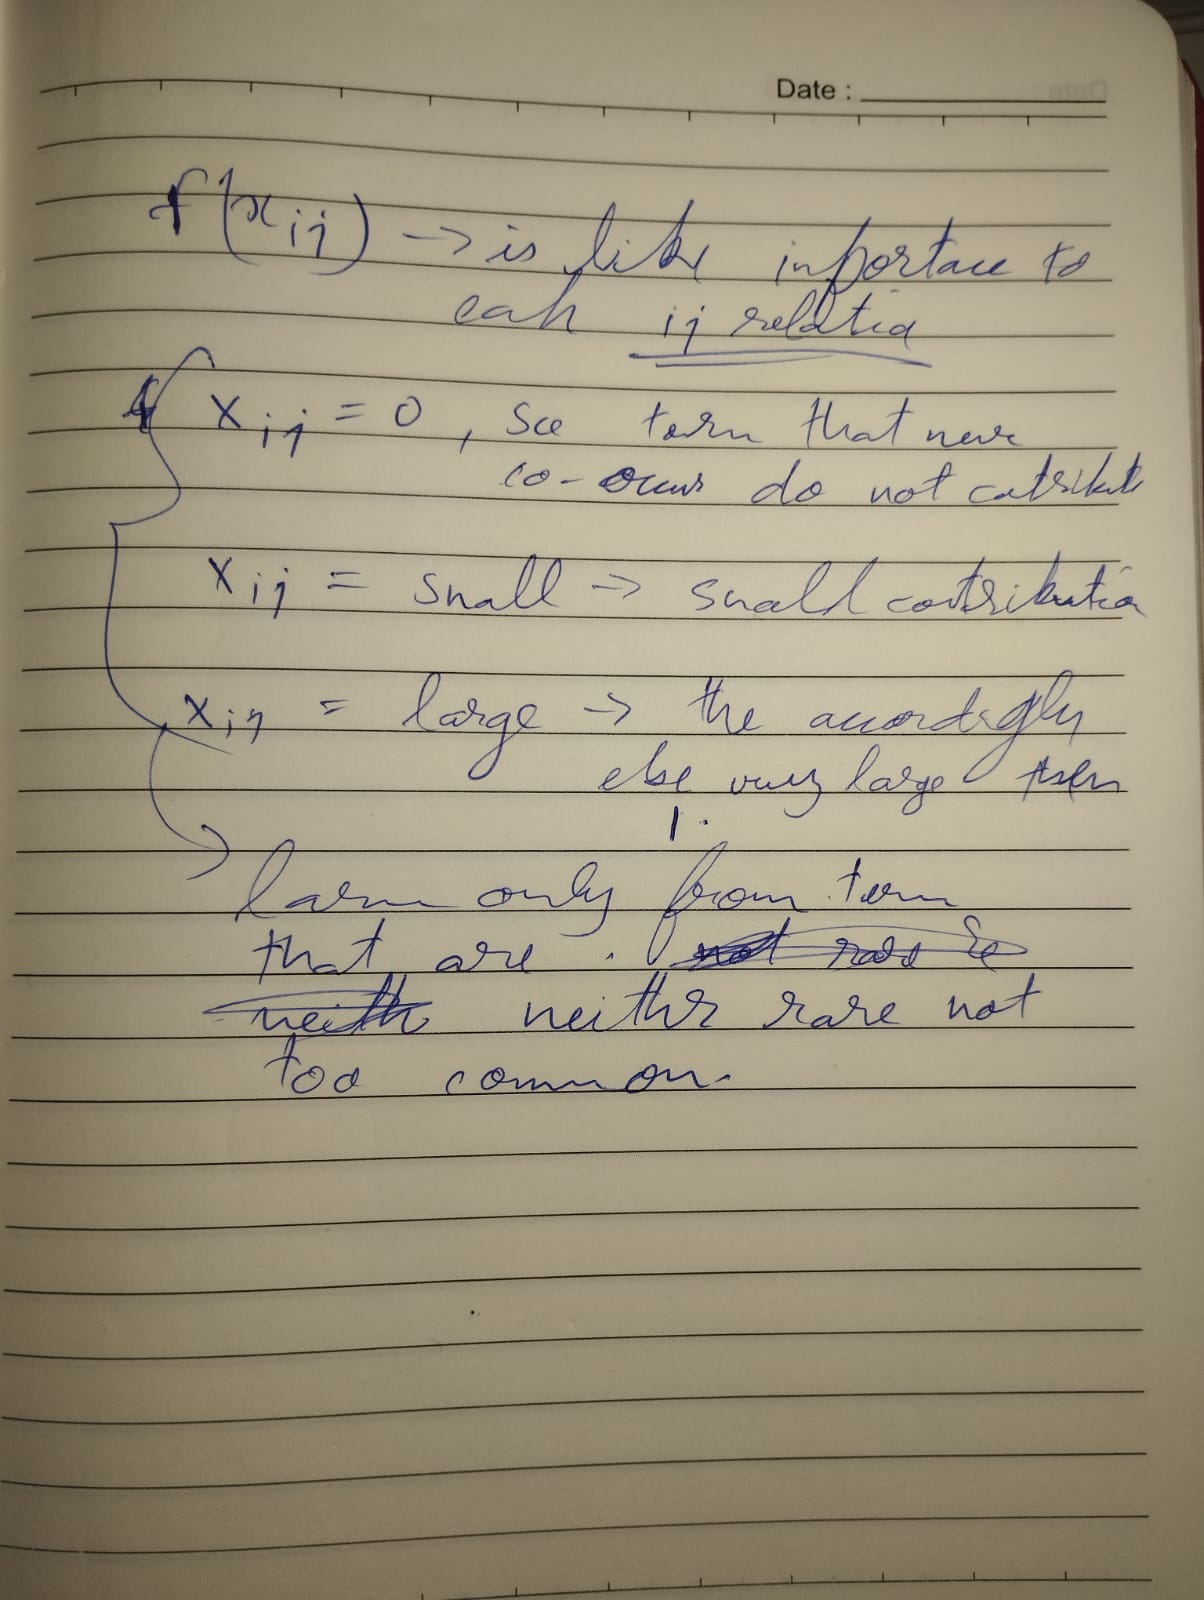

----------------

**Sentiment Anlysis of Sarcasm**
-


Loading Dataset

In [2]:
import json

f=open("Sarcasm_Headlines_Dataset_v2.json","r")

sentences= []
labels= []
urls= []

for line in f:
    item=json.loads(line)
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [3]:
print(len(sentences))
print(sentences[0])
print(labels[0])

28619
thirtysomething scientists unveil doomsday clock of hair loss
1


Generating Training and Test data

In [4]:
from sklearn.model_selection import train_test_split as tts
training_sentences, testing_sentences, train_label, test_label= tts(sentences, labels, test_size=0.2, random_state=42)

print(len(training_sentences))
print(len(train_label))
print(len(testing_sentences))
print(len(test_label))

22895
22895
5724
5724


In [5]:
input_dim= 10000
embedding_dim= 16
max_len= 100

Initilizing training tokenizer

1. After loading the dataset, initiate the tokenizer and fit it only on the Training set( training_sentences).
2. Create the sequences using the tokenizer and the training_sentence.
3. Th3e labels and sequences must be converted to npmpy array for the sequences tro be processed 

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer= Tokenizer(num_words=input_dim, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_dict= tokenizer.word_index
print(f"No. of tokens: {list(word_dict.values())[-1]}")

sequences= tokenizer.texts_to_sequences(training_sentences)
padded_sqn= pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

print(padded_sqn[0])
print(padded_sqn.shape)

No. of tokens: 27770
[  27   13  109  638   17  781   67 4774    5   43 1939    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
(22895, 100)


Tokenizing Testing data

In [7]:
test_sequences= tokenizer.texts_to_sequences(testing_sentences)
padded_sqn_test= pad_sequences(test_sequences, maxlen=max_len, padding="post", truncating="post")

In [8]:
import numpy as np

padded_sqn= np.array(padded_sqn)
train_label= np.array(train_label)
padded_sqn_test= np.array(padded_sqn_test)
test_label= np.array(test_label)

In [ ]:
# Generating Emeddings

from tensorflow.keras import layers, models

model=models.Sequential([
    layers.Embedding(input_dim, embedding_dim, input_length= max_len),
    layers.GlobalAveragePooling1D(),
    layers.Dense(24, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\AYUSH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
history= model.fit(padded_sqn, train_label, epochs=30, validation_data=(padded_sqn_test, test_label), verbose=1)
model.save("Sarcasm_detector.keras")

Epoch 1/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5428 - loss: 0.6880 - val_accuracy: 0.7790 - val_loss: 0.5919
Epoch 2/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7585 - loss: 0.5305 - val_accuracy: 0.8129 - val_loss: 0.4222
Epoch 3/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8283 - loss: 0.3926 - val_accuracy: 0.8307 - val_loss: 0.3827
Epoch 4/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8577 - loss: 0.3351 - val_accuracy: 0.8125 - val_loss: 0.3978
Epoch 5/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8678 - loss: 0.3039 - val_accuracy: 0.8457 - val_loss: 0.3453
Epoch 6/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8891 - loss: 0.2731 - val_accuracy: 0.8513 - val_loss: 0.3372
Epoch 7/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8989 - loss: 0.2470 - val_accuracy: 0.8220 - val_loss: 0.3982
Epoch 8/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9030 - loss: 0.2363 - val_accuracy: 0.

In [22]:
sentence = ["a rainy day sun shines the best"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.00449917]]
